# **Computational Theory Assessment G00417529**

# **Imports**

In [1]:
# numpy and unittest imports
import numpy as np
import unittest

# for mathematical functions (floor) on python floats.
# sometimes can cast to int to floor, but casting to int when negative round up
# instead of down.
import math

# hashlib import for comparing against our SHA-256 implementation
import hashlib

# 32-bit unsigned integer alies to reduce verbosity of notebook
# see: https://docs.python.org/3/library/typing.html
u32 = np.uint32

## **Introduction**
This section defines technical terms used for all the solutions in this notebook

### **Bitwise Terms and Operations**
**Bitwise Operations** are actions directly applied to individual bits of binary numbers. <br>
**Binary Words** are the natural unit of data a computer CPU can process with fixed lengths like 32bits (4 bytes) or 64 bits (8 bytes) <br><br>

**Bitwise AND ($\land$)/(`&`)**<br>
Compares each bit of two **binary words**.

For every bit position:
- The result bit is `1` only if both corresponding bits in the operands are `1`.
- Otherwise, the result bit is `0`.

<table style="border: 1px solid black; border-collapse: collapse; text-align: center; padding: 8px;">
  <tr>
    <th style="border: 1px solid black;">X</th>
    <th style="border: 1px solid black;">Y</th>
    <th style="border: 1px solid black;">X & Y</th>
  </tr>
  <tr>
    <td style="border: 1px solid black;">0</td>
    <td style="border: 1px solid black;">0</td>
    <td style="border: 1px solid black;">0</td>
  </tr>
  <tr>
    <td style="border: 1px solid black;">0</td>
    <td style="border: 1px solid black;">1</td>
    <td style="border: 1px solid black;">0</td>
  </tr>
  <tr>
    <td style="border: 1px solid black;">1</td>
    <td style="border: 1px solid black;">1</td>
    <td style="border: 1px solid black;">1</td>
  </tr>
</table><br>

**Bitwise OR (`|`)**<br>
For every bit position:
- The bit result is `1` if either bit is `1`.
- Otherwise, the result bit is `0`.

<table style="border: 1px solid black; border-collapse: collapse; text-align: center; padding: 8px;">
  <tr>
    <th style="border: 1px solid black;">X</th>
    <th style="border: 1px solid black;">Y</th>
    <th style="border: 1px solid black;">X | Y</th>
  </tr>
  <tr>
    <td style="border: 1px solid black;">0</td>
    <td style="border: 1px solid black;">0</td>
    <td style="border: 1px solid black;">0</td>
  </tr>
  <tr>
    <td style="border: 1px solid black;">0</td>
    <td style="border: 1px solid black;">1</td>
    <td style="border: 1px solid black;">1</td>
  </tr>
  <tr>
    <td style="border: 1px solid black;">1</td>
    <td style="border: 1px solid black;">1</td>
    <td style="border: 1px solid black;">1</td>
  </tr>
</table><br>

**Bitwise XOR ($\oplus$)/(`^`)**<br>
For every bit position:
- The bit result is `1` if both bits are different.
- Otherwise, the result bit is `0`.

<table style="border: 1px solid black; border-collapse: collapse; text-align: center; padding: 8px;">
  <tr>
    <th style="border: 1px solid black;">X</th>
    <th style="border: 1px solid black;">Y</th>
    <th style="border: 1px solid black;">X ^ Y</th>
  </tr>
  <tr>
    <td style="border: 1px solid black;">0</td>
    <td style="border: 1px solid black;">0</td>
    <td style="border: 1px solid black;">0</td>
  </tr>
  <tr>
    <td style="border: 1px solid black;">0</td>
    <td style="border: 1px solid black;">1</td>
    <td style="border: 1px solid black;">1</td>
  </tr>
  <tr>
    <td style="border: 1px solid black;">1</td>
    <td style="border: 1px solid black;">1</td>
    <td style="border: 1px solid black;">0</td>
  </tr>
</table><br>

**Bitwise NOT (`~`)**<br>
Flips every bit (`0→1`, `1→0`)

<table style="border: 1px solid black; border-collapse: collapse; text-align: center; padding: 8px;">
  <tr>
    <th style="border: 1px solid black;">X</th>
    <th style="border: 1px solid black;">~X</th>
  </tr>
  <tr>
    <td style="border: 1px solid black;">0</td>
    <td style="border: 1px solid black;">1</td>
  </tr>
  <tr>
    <td style="border: 1px solid black;">1</td>
    <td style="border: 1px solid black;">0</td>
  </tr>
</table><br>

## **Helper Functions**
Used to avoid duplicate code throughout solutions

### Local Unit Test Runner
Prevents variable redeclaration when running a specific test suite

In [2]:
def run_local_scope_tests(test_class, verbosity_lvl=0):
    """
    Runs specific unittest.TestCase without redeclaring variables in the global
    scope.

    Parameters:
        test_class : unittest.TestCase
            The test class containing test methods.
        verbosity_lvl : int, optional
            Verbosity level for the test runner (default is 0).

    Returns:
        result : unittest.result.TestResult
            The result object containing information about the tests run.
    """

    # Load all test methods from the given TestCase class
    suite = unittest.TestLoader().loadTestsFromTestCase(test_class)

    # Create a test runner with the specified verbosity
    runner = unittest.TextTestRunner(verbosity=verbosity_lvl)

    # Run the test suite and return the result
    return runner.run(suite)

### Converter
Automatically converts all plain int parameters of a given function into np.uint32 values, eliminating the need to implement individual type-checking logic for each method. <br>
Type checking only needs to be tested here once; instead of per method.

In [3]:
def force_u32(func, *args, **kwargs):
    # --------- Convert positional arguments ---------
    # Iterate through all positional arguments (collected in the `args` tuple)

    # If an argument is a plain Python int, convert it to np.uint32 using the
    # validated converter.

    # Non-int arguments (e.g., np.uint32, floats, strings) are passed through
    # unchanged.
    new_args = tuple(u32(a) if isinstance(a, int) else a for a in args)

    # --------- Convert keyword arguments ---------
    # Similarly process keyword arguments (stored in the `kwargs` dict).
    # Each value is checked and converted if it’s an int.
    new_kwargs = {key: u32(v) if isinstance(v, int) else v for key, v in kwargs.items()}

    return func(*new_args, **new_kwargs)

### Converter (force_u32) Test Method


In [4]:
def unconverted_method(x: u32, y: u32) -> u32:
    """
    used for unit testing force_u32 method

    Parameters:
        u32: x
        u32: y

    Returns:
        u32: x * y
    """

    return x * y

#### Converter Unit Tests

In [5]:
class TestForceU32(unittest.TestCase):
    """Unit tests for @force_u32 decorator and convert_to_u32 utility."""

    def test_aliasing(self):
        """Test that u32 alias returns np.uint32."""
        # Verify that the u32 alias is equivalent to np.uint32
        self.assertEqual(u32(5), np.uint32(5))
        self.assertIsInstance(u32(5), np.uint32)

    def test_positional_args(self):
        """Test that positional arguments are correctly converted
        by @force_u32."""
        # Call decorated function with positional arguments
        result = force_u32(unconverted_method, 7, 3)

        # Verify the result is correct and of type np.uint32
        self.assertEqual(result, 21)
        self.assertIsInstance(result, np.uint32)

    def test_keyword_args(self):
        """Test that keyword arguments are correctly converted by @force_u32."""
        # Call decorated function with keyword arguments
        result = force_u32(unconverted_method, x=66, y=11)

        # Verify the result is correct and of type np.uint32
        self.assertEqual(result, 726)
        self.assertIsInstance(result, np.uint32)

    # --- Tests to make sure type conversion accounts for boundry values and edge cases ---
    def test_min_value(self):
        """Test conversion of the minimum allowed value '0'."""
        # Call decorated function to automatically convert maximum value
        converted = force_u32(unconverted_method, 0, 0)

        # Test that the converted value is of type np.uint32
        self.assertIsInstance(converted, np.uint32)

        # Test that the converted value matches the expected 0 value
        self.assertEqual(converted, 0)

    def test_max_value(self):
        """Test conversion of the maximum allowed value '2**32 - 1'."""
        # Call decorated function to automatically convert maximum value
        converted = force_u32(unconverted_method, 2**32 - 1, 1)

        # Test that the converted value is of type np.uint32
        self.assertIsInstance(converted, np.uint32)

        # Test that the converted value matches the expected maximum u32 value
        self.assertEqual(converted, 2**32 - 1)

    def test_negative_value(self):
        """Test that negative integers raise a OverflowError."""
        # for each negative value in the list
        for val in [-1, -100, -(2**32)]:
            # Use subTest for better test reporting on multiple values
            with self.subTest(val=val):
                # Attempt to call decorated function and expect OverflowError
                with self.assertRaises(OverflowError):
                    # if we try to pass this value, it should raise an error for out of bounds
                    # unisgned int 32 can't be a negative
                    force_u32(unconverted_method, val, 1)

    def test_above_max_value(self):
        """Test that integers above the maximum (2**32 - 1) raise a OverflowError."""
        # for each value above the maximum u32
        for val in [2**32, 2**33, 9999999999]:
            # Use subTest for better test reporting on multiple values
            with self.subTest(val=val):
                # Attempt to call decorated function and expect OverflowError
                with self.assertRaises(OverflowError):
                    # if we try to pass this value, it should raise an error
                    # unisgned int 32 exceed its maximum size, while ints in python have a dynamic size
                    force_u32(unconverted_method, val, 1)


# Run test suite
run_local_scope_tests(TestForceU32)

----------------------------------------------------------------------
Ran 7 tests in 0.000s

OK


<unittest.runner.TextTestResult run=7 errors=0 failures=0>

### Metaclass
The BitOpMeta metaclass defines a bitwise operator class architecture that automatically adds common functionality to bitwise operation classes; eliminating repetitive boilerplate and improving code consistency.

This design abstracts shared setup logic, such as creating type-safe method variants, unit-test helpers, and callable behavior.
Each class only needs to define its core internal function (e.g., __ROTR), and BitOpMeta automatically injects the supporting methods, reducing verbosity while maintaining performance and clarity.

In [6]:
class BitOpMeta(type):
    """
    Metaclass for automatic setup of bitwise operation classes.

    Dynamically:
      • Detects the core internal method (e.g., `__ROTR`)
      • Creates a type-safe `.int_safe()` wrapper
      • Adds a default `.assert_me()` test helper if none is defined
      • Makes the class callable like a function (e.g., `ROTR(x, n)`)
    """

    # ----------------------------------------------------------------------
    # IntelliSense-visible placeholders — replaced dynamically at runtime.
    # These ensure VSCode and other IDEs show docstrings and call hints.
    # ----------------------------------------------------------------------
    @staticmethod
    def assert_me(
        test_case: unittest.TestCase,
        x: int,
        *args: int,
        expected: int,
        fail_msg: str,
        **kwargs,
    ) -> None:
        """Unit test helper (replaced dynamically by BitOpMeta)."""
        raise NotImplementedError("This method is dynamically replaced by BitOpMeta.")

    @staticmethod
    def int_safe(*args: int, **kwargs) -> u32:
        """Type-safe variant (replaced dynamically by BitOpMeta)."""
        raise NotImplementedError("This method is dynamically replaced by BitOpMeta.")

    # ----------------------------------------------------------------------
    # Allows calling the class directly as a function.
    # Example: ROTR(x, n) = ROTR._internal_func(x, n)
    # ----------------------------------------------------------------------
    def __call__(cls, *args, **kwargs):
        return cls._internal_func(*args, **kwargs)

    # ----------------------------------------------------------------------
    # Main construction logic: executed once per bitwise operation class.
    # ----------------------------------------------------------------------
    def __new__(mcls, name, bases, dct):
        """Intercepts class creation and injects dynamic behavior."""
        # Retrieve the internal core function (e.g., _ROTR__ROTR)
        internal_func = dct[f"_{name}__{name}"]

        # Create a static type-safe wrapper using force_u32()
        # This avoids repetitive conversions in each class definition.
        dct["int_safe"] = staticmethod(
            lambda *a, **kw: force_u32(internal_func, *a, **kw)
        )

        # Add a default unit-test helper if none is defined.
        if "assert_me" not in dct:

            def assert_me(test_case, x, *args, expected, fail_msg, **kwargs):
                """Asserts that int_safe() output matches expected result."""

                # calculate result using dynamic classes int_safe functionality
                result = dct["int_safe"](x, *args, **kwargs)

                # asserts unitest to ensure class works correctly
                test_case.assertEqual(result, expected, fail_msg)

            # injects method into class dynamically
            dct["assert_me"] = staticmethod(assert_me)

        # Construct the class using parent constructor
        cls = super().__new__(mcls, name, bases, dct)

        # Store internal reference and enable callable behavior
        cls._internal_func = internal_func

        return cls

## **Problem 1: Binary Words and Operations**

### Design Decisions
**Old design decision**<br>
I chose to statically define all parameter types as NumPy 32-bit unsigned integers ``(np.uint32)`` to avoid writing defensive runtime checks and to improve performance.
In the Secure Hash Standard, this function would be called millions of times per hash computation. While this notebook is primarily meant to demonstrate functionality and could therefore benefit from more flexible, dynamically typed inputs I believe performance is just as critical as correctness in these bitwise operations. After all, these functions are designed to operate at the bit level for efficiency and precision; type checking them with expensive calls would defeat the purpose.

**Updated Design decision**<br>
- The core methods still define parameters with static typing for maximum performance.
- A new type-conversion metaclass, ``BitOpMeta``, provides the best of both worlds; enabling automatic safe conversion of Python int values to ``np.uint32`` where appropriate,<br>
while leveraging existing code. This eliminates the need to maintain duplicate function logic and duplicate test logic (one with type conversion and one with static typing).
- All related methods are now encapsulated in static classes, giving the user explicit control over usage style:
    - ``ClassName()`` High-performance version (expects np.uint32 arguments).
    - ``ClassName.int_safe`` Decorated version with automatic type conversion for readability and convenience.

- Each static class also includes an ``assert_me`` method to streamline and simplify unit testing, improving clarity and reducing boilerplate.
- Methods are dynamically created using metaclass to remove boilderplate code while allowing fast and dynamic functionality

This design allows you to call binary word operations directly with regular Python integers without manually wrapping every argument in ``u32()`` or ``np.uint32()``.<br>
At the same time, performance-critical code (such as within tight loops where functions can be called millions of times) can achieve up to 3× faster execution by using the undecorated internal method.

### 1.1 Parity Function
$\text{Parity}(x, y, z) = x \oplus y \oplus z$ <br>
Implemented as defined in [FIPS, Section 4.1.1](https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf)

**How it works:** <br>
Applies bitwise eclusive or (XOR) to three 32-bit unsigned integers (x, y, z). <br>
For each bit position of x, y and z:
- if an odd number of bits are 1, the result is 1
- if an even number of bits are 1, the result is 0

Worked example shown at [Parity Unit Tests](#1.12-Parity-Unit-Tests) output.

In [7]:
class Parity(metaclass=BitOpMeta):
    """
    ## Operation:
        Applies bitwise eclusive or (XOR) to three 32-bit unsigned integers (x, y, z).
        For each bit position of x, y and z:
            - if an odd number of bits are 1, the result is 1
            - if an even number of bits are 1, the result is 0

    ## Parameters:
        (all arguments are of numpy unsigned 32-bit integer type)
        x: First integer
        y: Second integer.
        z: Third integer.

    ## Returns:
        u32: Operation result

    ## Class Utilities:
        `ROTR.int_safe` runs function with ints as parameters
        `ROTR.assert_me` runs test_case assertEqual function against ``assert_me`` function inputs.
    """

    # interal perfomance function
    @staticmethod
    def __Parity(x: u32, y: u32, z: u32) -> u32:
        # Apply bitwise XOR to the three integers and return the result
        return x ^ y ^ z

    # Unit test method template
    # improves readability and reduces boilerplate code in unit tests
    @staticmethod
    def assert_me(
        test_class: unittest.TestCase,
        x: int,
        y: int,
        z: int,
        expected: int,
        fail_msg: str,
        print_equation: bool = False,
    ) -> None:
        """
        ## Overview:
            Asserts Parity function via TestCase.assertEqual() method.
                - used for readability in unit tests
                - can print detailed equation breakdown for debugging and verification.
                - automatically converts int inputs to np.uint32

        ## Parameters:
            test_class: The unittest.TestCase instance to use for assertions.
            x: First integer input for Parity.
            y: Second integer input for Parity.
            z: Third integer input for Parity.
            expected: The expected result of Parity(x, y, z).
            fail_msg: Message to display if the test fails.
            print_equation: If True, prints detailed equation breakdown.

        ## returns:
            None
        """

        # fetch result from Parity function
        result: u32 = Parity.int_safe(x, y, z)

        # Optional detailed equation info printout
        if print_equation:
            print(
                "----------------------------------------------------------------------"
            )
            # print formatted test info
            print(f"Testing Parity with inputs: x={x} y={y} z={z}")
            print(f"Equation: {x} ⊕ {y} ⊕ {z} = {result}\n")
            print(f"Expected result: {expected}")
            print(f"Actual result: {result}\n")

            # detailed breakdown of the equation steps
            print("Equation breakdown:")

            # print inputs in binary format
            print(
                f"Inputs as binary:\n"
                f"(x): {x:032b}\n"
                f"(y): {y:032b}\n"
                f"(z): {z:032b}\n"
            )

            # print step 1
            a_result: u32 = x ^ y
            print("Step 1: x ⊕ y:")
            print(f"(x): {x:032b}\n(y): {y:032b}")
            print(f"-------------------------- \n(a): {a_result:032b}\n")

            # print step 2
            b_result: u32 = a_result ^ z
            print("Step 2: a ⊕ z:")
            print(f"(a): {a_result:032b}\n(z): {z:032b}")
            print(f"-------------------------- \nResult: {b_result:032b}\n")

            # end section printout
            print(
                "----------------------------------------------------------------------"
            )

        # Assert that the result matches the expected value
        test_class.assertEqual(result, expected, fail_msg)

### 1.12 Parity Unit Tests

In [8]:
# Unit tests for the Parity method.
class TestParity(unittest.TestCase):
    def test_base_cases(self):
        """Basic XOR combinations."""
        # 0 ⊕ 0 ⊕ 0 = 0
        Parity.assert_me(
            self, x=0, y=0, z=0, expected=0, fail_msg="Failed on all zeros"
        )

        # 1 ⊕ 0 ⊕ 0 = 1
        Parity.assert_me(
            self, x=1, y=0, z=0, expected=1, fail_msg="Failed when only x=1"
        )

        # 1 ⊕ 1 ⊕ 0 = 0
        Parity.assert_me(
            self, x=1, y=1, z=0, expected=0, fail_msg="Failed on even number of 1s"
        )

        # 1 ⊕ 1 ⊕ 1 = 1
        Parity.assert_me(
            self, x=1, y=1, z=1, expected=1, fail_msg="Failed on odd number of 1s"
        )

    def test_non_trivial_cases(self):
        """Non-trivial test cases with larger integers."""

        # Test case 1
        # Showing detailed workings of how Parity method works
        Parity.assert_me(
            self,
            x=14,
            y=32,
            z=11,
            expected=37,
            fail_msg="Failed on non-trivial case 1",
            print_equation=True,
        )


run_local_scope_tests(TestParity, 2)

test_base_cases (__main__.TestParity.test_base_cases)
Basic XOR combinations. ... ok
test_non_trivial_cases (__main__.TestParity.test_non_trivial_cases)
Non-trivial test cases with larger integers. ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.002s

OK


----------------------------------------------------------------------
Testing Parity with inputs: x=14 y=32 z=11
Equation: 14 ⊕ 32 ⊕ 11 = 37

Expected result: 37
Actual result: 37

Equation breakdown:
Inputs as binary:
(x): 00000000000000000000000000001110
(y): 00000000000000000000000000100000
(z): 00000000000000000000000000001011

Step 1: x ⊕ y:
(x): 00000000000000000000000000001110
(y): 00000000000000000000000000100000
-------------------------- 
(a): 00000000000000000000000000101110

Step 2: a ⊕ z:
(a): 00000000000000000000000000101110
(z): 00000000000000000000000000001011
-------------------------- 
Result: 00000000000000000000000000100101

----------------------------------------------------------------------


<unittest.runner.TextTestResult run=2 errors=0 failures=0>

### 1.2 Ch Function
$\text Ch(x, y, z) = (x \land y) \oplus (\lnot x \land z)$ <br>
Implemented as defined in [FIPS, Section 4.1.1](https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf)

**How it works:**<br>
For each bit position of x, y, and z:
- If the bit in x is 1; take the bit from y
- If the bit in x is 0; take the bit from z

This is achieved by using x as a selector bit mask.
- When a bit in x is 0, the expression $(x \land y)$ evaluates to 0 because the AND operation masks out the corresponding bit in y.
- Simultaneously, (~x & z) evaluates to the corresponding bit in z, because ~x flips the 0 in x to 1, allowing the bit from z to pass through the mask.
- if either one of the expressions evaluates to 1, the $\oplus$ (XOR) will return 1 for that bit.
- This would mean a simple ``OR`` operation would work instead of ``XOR`` as only 1 of the expressions can evaluate to 1 at the same time.

**Worked Example** is shown at [Ch unit tests](#1.21-Cha-Unit-Tests) output.


In [9]:
class Ch(metaclass=BitOpMeta):
    """
    ## Operation:
        For each bit position of x, y, and z:
            - If the bit in x is 1; take the bit from y
            - If the bit in x is 0; take the bit from z

    Parameters:
        x (u32): First 32-bit unsigned integer (bit selector mask)
        y (u32): Second 32-bit unsigned integer
        z (u32): Third 32-bit unsigned integer

    Returns:
        u32: Result of the 'Choose' operation.

    ## Class Utilities:
        `ROTR.int_safe` runs function with ints as parameters
        `ROTR.assert_me` runs test_case assertEqual function against ``assert_me`` function inputs.
    """

    # Internal perfomance function
    @staticmethod
    def __Ch(x: u32, y: u32, z: u32) -> u32:
        return (x & y) ^ (~x & z)

    # Unit test helper method (readable and reusable)
    @staticmethod
    def assert_me(
        test_class: unittest.TestCase,
        x: int,
        y: int,
        z: int,
        expected: int,
        fail_msg: str,
        print_equation: bool = False,
    ) -> None:
        """
        Overview:
            Asserts correctness of the Ch function using unittest's assertEqual().
            Can print detailed equation breakdown for debugging and verification.

        Parameters:
            test_class (unittest.TestCase): The unittest instance performing the assertion.
            x (int): First integer input for Ch.
            y (int): Second integer input for Ch.
            z (int): Third integer input for Ch.
            expected (int): The expected result.
            fail_msg (str): Message to display if the test fails.
            print_equation (bool): If True, prints the detailed bitwise computation.

        Returns:
            None
        """

        # Run the user-facing safe version
        result: u32 = Ch.int_safe(x, y, z)

        # Optional detailed debug print
        if print_equation:
            print(
                "----------------------------------------------------------------------"
            )
            # Print formatted test information
            print(f"Testing Ch with inputs: x:{x} y:{y} z:{z}")
            print(f"Equation: ({x} & {y}) ⊕ (~{x} & {z}) = {result}")
            print(f"Expected result: {expected}")
            print(f"Actual result:   {result}\n")

            # Print detailed breakdown of the equation steps
            print("Equation breakdown:")
            print("Inputs as binary:")
            print(f"(x): {x:032b}\n(y): {y:032b}\n(z): {z:032b}\n")

            # Step 1: Compute x & y
            a_result: u32 = x & y
            print("Step 1: x & y:")
            print(f"(x): {x:032b}\n(y): {y:032b}")
            print(f"--------------------------\n(a): {a_result:032b}\n")

            # Step 2: Compute ~x & z
            b_result: u32 = (~x) & z
            print("Step 2: ~x & z:")
            print(f"(~x): {~x & 0xFFFFFFFF:032b}\n(z):  {z:032b}")  # mask to 32 bits
            print(f"--------------------------\n(b):  {b_result:032b}\n")

            # Step 3: XOR results
            final: u32 = a_result ^ b_result
            print("Step 3: (x & y) ⊕ (~x & z):")
            print(f"(a): {a_result:032b}\n(b): {b_result:032b}")
            print(f"--------------------------\nResult: {final:032b}")
            print(
                "----------------------------------------------------------------------"
            )

        # Perform the actual test
        test_class.assertEqual(result, expected, fail_msg)

### 1.21 Cha Unit Tests

In [10]:
# Unit tests for the Ch (Choose) method.
class TestCh(unittest.TestCase):
    def test_base_cases(self):
        """Basic bitwise choose (Ch) combinations."""

        # (0 & 0) ⊕ (~0 & 0) = 0
        Ch.assert_me(self, x=0, y=0, z=0, expected=0, fail_msg="Failed on all zeros")

        # (0 & 0) ⊕ (~0 & 1) = 1
        Ch.assert_me(
            self, x=0, y=0, z=1, expected=1, fail_msg="Failed when x=0, y=0, z=1"
        )

        # (1 & 0) ⊕ (~1 & 1) = 0
        Ch.assert_me(
            self, x=1, y=0, z=1, expected=0, fail_msg="Failed when x=1, y=0, z=1"
        )

        # (1 & 1) ⊕ (~1 & 0) = 1
        Ch.assert_me(
            self, x=1, y=1, z=0, expected=1, fail_msg="Failed when x=1, y=1, z=0"
        )

        # (1 & 1) ⊕ (~1 & 1) = 1
        Ch.assert_me(self, x=1, y=1, z=1, expected=1, fail_msg="Failed when all are 1s")

        # (0 & 1) ⊕ (~0 & 1) = 1
        Ch.assert_me(
            self, x=0, y=1, z=1, expected=1, fail_msg="Failed when x=0, y=1, z=1"
        )

    def test_non_trivial_cases(self):
        """Non-trivial test cases with larger integers."""

        # Test case 1
        # Showing detailed workings of how cha method works
        Ch.assert_me(
            self,
            x=32,
            y=11,
            z=42,
            expected=(32 & 11) ^ (~32 & 42),
            fail_msg="Failed on non-trivial case 1",
            print_equation=True,
        )

        # Test case 2
        Ch.assert_me(
            self,
            x=63,
            y=3,
            z=12,
            expected=(63 & 3) ^ (~63 & 12),
            fail_msg="Failed on non-trivial case 2",
        )


run_local_scope_tests(TestCh, 2)

test_base_cases (__main__.TestCh.test_base_cases)
Basic bitwise choose (Ch) combinations. ... ok
test_non_trivial_cases (__main__.TestCh.test_non_trivial_cases)
Non-trivial test cases with larger integers. ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.002s

OK


----------------------------------------------------------------------
Testing Ch with inputs: x:32 y:11 z:42
Equation: (32 & 11) ⊕ (~32 & 42) = 10
Expected result: 10
Actual result:   10

Equation breakdown:
Inputs as binary:
(x): 00000000000000000000000000100000
(y): 00000000000000000000000000001011
(z): 00000000000000000000000000101010

Step 1: x & y:
(x): 00000000000000000000000000100000
(y): 00000000000000000000000000001011
--------------------------
(a): 00000000000000000000000000000000

Step 2: ~x & z:
(~x): 11111111111111111111111111011111
(z):  00000000000000000000000000101010
--------------------------
(b):  00000000000000000000000000001010

Step 3: (x & y) ⊕ (~x & z):
(a): 00000000000000000000000000000000
(b): 00000000000000000000000000001010
--------------------------
Result: 00000000000000000000000000001010
----------------------------------------------------------------------


<unittest.runner.TextTestResult run=2 errors=0 failures=0>

### 1.3 Maj Function
$\text Maj(x, y, z) = (x \land y) \oplus (x \land z) \oplus (y \land z)$ <br>
Implemented as defined in [FIPS, Section 4.1.1](https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf)

**How it works:**<br>
For each bit position of x, y, and z:
- Returns the bit that is in the majority
- if at least two of the inputs are 1

| X | Y | Z |
|---|---|---|
| 1 | 1 | 1 |

$(x \land y) \oplus (x \land z) \oplus (y \land z)$ <br>
**(A):** $(x \land y)$ = $(1 \land 1)$ = 1 <br>
**(B):** $(x \land z)$ = $(1 \land 1)$ = 1 <br>
**(C):** $(y \land z)$ = $(1 \land 1)$ = 1 <br>
**(D):** $ A \oplus B \oplus C $ = $ 1 \oplus 1 \oplus 1 $ = 1

**Worked Example** is shown at [Maj unit tests](#1.31-Maj-Unit-Tests) output.

In [11]:
class Maj(metaclass=BitOpMeta):
    """
    ## Operation:
        For each bit position of x, y, and z:
            - Returns the bit that is in the majority
            - if at least two of the inputs are 1

    Parameters:
        x (u32): First 32-bit unsigned integer
        y (u32): Second 32-bit unsigned integer
        z (u32): Third 32-bit unsigned integer

    Returns:
        u32: Result of the 'Majority' operation.

    ## Class Utilities:
        `ROTR.int_safe` runs function with ints as parameters
        `ROTR.assert_me` runs test_case assertEqual function against ``assert_me`` function inputs.
    """

    # Internal perfomance function
    @staticmethod
    def __Maj(x: u32, y: u32, z: u32) -> u32:
        return (x & y) ^ (x & z) ^ (y & z)

    # Unit test helper method (readable and reusable)
    @staticmethod
    def assert_me(
        test_class: unittest.TestCase,
        x: int,
        y: int,
        z: int,
        expected: int,
        fail_msg: str,
        print_equation: bool = False,
    ) -> None:
        """
        Overview:
            Asserts correctness of the Maj function using unittest's assertEqual().
            Can print detailed equation breakdown for debugging and verification.

        Parameters:
            test_class (unittest.TestCase): The unittest instance performing the assertion.
            x (int): First integer input for Maj.
            y (int): Second integer input for Maj.
            z (int): Third integer input for Maj.
            expected (int): The expected result.
            fail_msg (str): Message to display if the test fails.
            print_equation (bool): If True, prints the detailed bitwise computation.

        Returns:
            None
        """

        # Run the user-facing safe version
        result: u32 = Maj.int_safe(x, y, z)

        # Optional detailed debug print
        if print_equation:
            print(
                "----------------------------------------------------------------------"
            )
            # Print formatted test information
            print(f"Testing Maj with inputs: x:{x} y:{y} z:{z}")
            print(f"Equation: (x & y) ⊕ (x & z) ⊕ (y & z) = {result}")
            print(f"Expected result: {expected}")
            print(f"Actual result:   {result}\n")

            # Print detailed breakdown of the equation steps
            print("Equation breakdown:")
            print("Inputs as binary:")
            print(f"(x): {x:032b}\n(y): {y:032b}\n(z): {z:032b}\n")

            # Step 1: Compute x & y
            a_result: u32 = x & y
            print("Step 1: x & y:")
            print(f"(x): {x:032b}\n(y): {y:032b}")
            print(f"--------------------------\n(a): {a_result:032b}\n")

            # Step 2: Compute x & z
            b_result: u32 = x & z
            print("Step 2: x & z:")
            print(f"(x): {x:032b}\n(z): {z:032b}")
            print(f"--------------------------\n(b): {b_result:032b}\n")

            # Step 3: Compute y & z
            c_result: u32 = y & z
            print("Step 3: y & z:")
            print(f"(y): {y:032b}\n(z): {z:032b}")
            print(f"--------------------------\n(c): {c_result:032b}\n")

            # Step 4: XOR the intermediate results
            final: u32 = a_result ^ b_result ^ c_result
            print("Step 4: (x & y) ⊕ (x & z) ⊕ (y & z):")
            print(f"(a): {a_result:032b}\n(b): {b_result:032b}\n(c): {c_result:032b}")
            print(f"--------------------------\nResult: {final:032b}")
            print(
                "----------------------------------------------------------------------"
            )

        # Perform the actual test
        test_class.assertEqual(result, expected, fail_msg)

#### 1.31 Maj Unit Tests

In [12]:
# Unit tests for the Maj method.
class TestMaj(unittest.TestCase):
    """Unit tests for the Maj function."""

    def test_base_cases(self):
        """Basic majority validation."""

        # Case 1: x=0, y=0, z=0
        Maj.assert_me(self, x=0, y=0, z=0, expected=0, fail_msg="Failed on all zeros")

        # Case 2: x=0, y=0, z=1
        Maj.assert_me(self, x=0, y=0, z=1, expected=0, fail_msg="Failed when z=1 only")

        # Case 3: x=0, y=1, z=1
        Maj.assert_me(
            self, x=0, y=1, z=1, expected=1, fail_msg="Failed when x=0, y=1, z=1"
        )

        # Case 4: x=1, y=0, z=1
        Maj.assert_me(
            self, x=1, y=0, z=1, expected=1, fail_msg="Failed when x=1, y=0, z=1"
        )

        # Case 5: x=1, y=1, z=1
        Maj.assert_me(
            self, x=1, y=1, z=1, expected=1, fail_msg="Failed when all are 1s"
        )

    def test_non_trivial_cases(self):
        """non-trivial majority validation."""

        # Case 1: non-trivial case
        Maj.assert_me(
            self,
            x=7,
            y=8,
            z=2,
            expected=2,
            fail_msg="Failed on large number case",
            print_equation=True,
        )


# Run tests in a local scope
run_local_scope_tests(TestMaj, 2)

test_base_cases (__main__.TestMaj.test_base_cases)
Basic majority validation. ... ok
test_non_trivial_cases (__main__.TestMaj.test_non_trivial_cases)
non-trivial majority validation. ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.003s

OK


----------------------------------------------------------------------
Testing Maj with inputs: x:7 y:8 z:2
Equation: (x & y) ⊕ (x & z) ⊕ (y & z) = 2
Expected result: 2
Actual result:   2

Equation breakdown:
Inputs as binary:
(x): 00000000000000000000000000000111
(y): 00000000000000000000000000001000
(z): 00000000000000000000000000000010

Step 1: x & y:
(x): 00000000000000000000000000000111
(y): 00000000000000000000000000001000
--------------------------
(a): 00000000000000000000000000000000

Step 2: x & z:
(x): 00000000000000000000000000000111
(z): 00000000000000000000000000000010
--------------------------
(b): 00000000000000000000000000000010

Step 3: y & z:
(y): 00000000000000000000000000001000
(z): 00000000000000000000000000000010
--------------------------
(c): 00000000000000000000000000000000

Step 4: (x & y) ⊕ (x & z) ⊕ (y & z):
(a): 00000000000000000000000000000000
(b): 00000000000000000000000000000010
(c): 00000000000000000000000000000000
--------------------------
Result: 0

<unittest.runner.TextTestResult run=2 errors=0 failures=0>

### 1.4 Implementing Sigma functions
#### 1.41 Helper Functions
The sigma functions use the following methods throughout their implementation:
- **ROTR** (Circular right shift Operation)
- **SHR** ( Right Shift Operation )

These functions have been implemented using their defentions [FIPS 180-4, Section 3.2: Operations on Words](https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf) as reference. <br>
My implementation has 1 small change, allowing ``n``, number of shifts to be dynamic python ``int`` size in the ``ROTR`` function <br>
**How this is achieved is explained in the [ROTR](#Circular-right-shift-Operation) section.**

#### 1.411 Circular right shift Operation
$\text{ROTR}^n(x) = (x \gg n) \lor (x \ll w - (n \% 32))$

**How it works:**
- Shifts bits to the right ``n`` number of times.
- bits that have fallen over the unsigned 32 integer limit (32) move back to the start.
- Flow: (Rotating past end) -> (Start) -> (End)

**Example:** <br>
We will be using **8 bit unsigned int** for this example as it's much smaller scale <br>
In langagues like C, this can be a unsigned char type.
- ``n = 4``: number of positions shifted
- ``x = 45``: value that is being shifted
- ``w = 8``: width of value data-type

- X Binary reprentation = ``00101101``

**Step 1 (A): Shift ``x`` to right ``n`` times** <br>
00101101 -> 00000010

**Step 2 (C): Shift ``x`` to left ``w - n`` times** <br>
**(B):** (w - n) = (8 - 4) = **4**
00101101 -> 11010000

**Step 3 (D): Use ``Or`` to glue rolled off ends together** <br>
**A:** 00000010 <br>
**C:** 11010000 <br>
________________ (OR) <br>
11010010

##### **Allowing dynamic size number of rotations past data type bit width**
I use Mod ``%``, so if ``n`` exceeds ``w`` width, it handles it: <br>
- 36 % 32 = 4
- effectively turning n = 4, as we've rotated back to the start with an overflow of 4
- You can also achieve this by using the bitwise ``AND`` operator, but we don't use it as in python there is no preformance benefit. <br>

**why does ``AND`` work instead of ``%``?** <br>
we can use ``AND`` to mask any bits outside our data-type bit width, giving us the exact remaining value. <br>

**Example**<br>
unsigned 8 bit value ``110001`` (49) <br>
bit width ``w = 8`` <br>
shift size ``n = 21``<br>

Calculating new n size using mask:
``(w-1) & n`` -> ``(8-1) & 21`` -> ``(7) & 21``
Converting to Binary for demonstration:
``(111) & 10101`` <br>

00010101 <br>
00000111 <br>
________________  ``&`` <br>
00000101 <br>

n is now = 5, which is the same as ``8 mod 21``

In [13]:
class ROTR(metaclass=BitOpMeta):
    """
    Right rotate a 32-bit word x by n bits.

    Parameters:
        x (u32): integer to rotate.
        n (u32): Number of bits to rotate ``x``.

    Returns:
        u32: Result of the right rotation.

    ## Class Utilities:
        `ROTR.int_safe` runs function with ints as parameters
        `ROTR.assert_me` runs ``unittest.TestCase`` assertEqual function against ``assert_me`` function inputs.
    """

    # internal perfomance function
    @staticmethod
    def __ROTR(x: u32, n: int) -> u32:
        # for w, we use 32 as we are working with a 32 bit unisgned integer
        # we use mod to allow any shifting amount
        return (x >> n) | (x << (32 - (n % 32)))

#### ROTR Unit Tests

In [14]:
class TestROTR(unittest.TestCase):
    """Unit tests for the ROTR function."""

    def test_basic_rotations(self):
        """Basic right rotation tests."""

        # Case 1: Rotate 0 by any amount (5): result 0
        ROTR.assert_me(self, x=0x0, n=5, expected=0, fail_msg="Failed rotating 0")

        # Case 2: Rotate 0xFFFFFFFF by 4: result 0xFFFFFFFF
        ROTR.assert_me(
            self,
            x=0xFFFFFFFF,
            n=4,
            expected=0xFFFFFFFF,
            fail_msg="Failed rotating all ones",
        )

    def test_function_call_versions(self):
        """Test that all versions of calling function work with same result"""

        # Case 3: Rotate 1 by 1: result 0x80000000
        ROTR.assert_me(
            self,
            x=0x1,
            n=1,
            expected=0b10000000000000000000000000000000,  # as you see x moved from start to end in 32bit binary
            fail_msg="Failed rotating 1 by 1",
        )

        # Case 3.1: Same as above, but using direct call
        self.assertEqual(
            ROTR(u32(1), u32(1)),
            0b10000000000000000000000000000000,
            "Failed rotating 1 by 1 directly",
        )

        # case 3.2: same as above, but using safe_int version
        self.assertEqual(
            ROTR.int_safe(1, 1),
            0b10000000000000000000000000000000,
            "Failed rotating 1 by 1 via int safe method",
        )

    def test_non_trivial_rotations(self):
        """Non-trivial right rotation tests."""

        # Case 4: Rotate 0x12345678 by 8: result 0x78123456
        ROTR.assert_me(
            self,
            x=0x12345678,
            n=8,
            expected=0x78123456,
            fail_msg="Failed rotating 0x12345678 by 8",
        )

        # Case 5: Rotate 0x11223344 by 16: result 0x88224466
        ROTR.assert_me(
            self,
            x=0x11223344,
            n=7,
            expected=0x88224466,
            fail_msg="Failed rotating 0x11223344 by 7",
        )

    def test_handle_n_overflow(self):
        # case 6: Rotate 0x1 by 40, n should be wrapped to 8
        ROTR.assert_me(
            self,
            x=0x1,
            n=40,
            expected=0x1000000,
            fail_msg="Failed rotating 0x1 over data-type bit size",
        )


# Run tests in a local scope
run_local_scope_tests(TestROTR, 2)

test_basic_rotations (__main__.TestROTR.test_basic_rotations)
Basic right rotation tests. ... ok
test_function_call_versions (__main__.TestROTR.test_function_call_versions)
Test that all versions of calling function work with same result ... ok
test_handle_n_overflow (__main__.TestROTR.test_handle_n_overflow) ... ok
test_non_trivial_rotations (__main__.TestROTR.test_non_trivial_rotations)
Non-trivial right rotation tests. ... ok

----------------------------------------------------------------------
Ran 4 tests in 0.003s

OK


<unittest.runner.TextTestResult run=4 errors=0 failures=0>

#### Right Shift Operation
$\text{SHR}^n(x) = x \gg n$

**Purpose:**
Used throughout secure hash algoiorthms e.g. in small sigma functions to move bits to the right while inserrting zeros on the left.

**How it works:**
- Shifts bits to the right ``n`` number of times.
- bits that have fallen over the data-type size limit do not return, filled with zeros.

**Example:** <br>
We will be using **8 bit unsigned int** for this example as it's much smaller scale <br>
In langagues like C, this can be a unsigned char type.
- ``n = 4``: number of positions shifted
- ``x = 45``: value that is being shifted

- X Binary reprentation = ``00101101``

**Step 1 (A): Shift ``x`` to right ``n`` times** <br>
00101101 -> 00000010

In [15]:
class SHR(metaclass=BitOpMeta):
    """
    Performs a logical right shift on a 32-bit unsigned integer.

    Parameters:
        x (u32): Number to shift.
        n (int): Number of bit positions to shift right.

    Returns:
        u32: Result of shifting `x` right by `n` bits, filling with zeros on the left.

    Example:
        SHR(0b1000, 1) → 0b0100.

    ## Class-Utilities:
        `SHR.int_safe` runs function with ints as parameters
        `SHR.assert_me` runs ``unittest.TestCase`` assertEqual function against ``assert_me`` function inputs.
    """

    def __SHR(x: u32, n: int) -> u32:
        return x >> n

#### SHR Unit Tests

In [16]:
class TestSHR(unittest.TestCase):
    """Unit tests for the SHR (logical right shift) function."""

    def test_basic_shifts(self):
        """Basic logical right shift cases."""

        # Case 1. Shift 0 by any amount = 0 (0b0 -> 0b0)
        SHR.assert_me(self, x=0x0, n=4, expected=0x0, fail_msg="Failed shifting 0")

        # Case 2. Shift 2 (0b10) by 1 = 1 (0b10 -> 0b01)
        SHR.assert_me(self, x=0x2, n=1, expected=0x1, fail_msg="Failed shifting 2 by 1")

        # Case 3. Shift 0xFFFFFFFF by 1 = 0x7FFFFFFF
        SHR.assert_me(
            self,
            x=0xFFFFFFFF,
            n=1,
            expected=0x7FFFFFFF,
            fail_msg="Failed shifting all ones by 1",
        )

        # Case 4. Shift over bit width
        SHR.assert_me(
            self,
            x=0xFFFFFFFF,
            n=33,
            expected=0x0,
            fail_msg="Failed shifting over data type bit width",
        )


# Run tests locally
run_local_scope_tests(TestSHR, 2)

test_basic_shifts (__main__.TestSHR.test_basic_shifts)
Basic logical right shift cases. ... ok

----------------------------------------------------------------------
Ran 1 test in 0.001s

OK


<unittest.runner.TextTestResult run=1 errors=0 failures=0>

#### 1.5 large Sigma 0
$\Sigma_{0}^{256}(x) \;=\; \mathrm{ROTR}^2(x) \;\oplus\; \mathrm{ROTR}^{13}(x) \;\oplus\; \mathrm{ROTR}^{22}(x)$ <br>
Implemented as defined in [FIPS 180-4, Section 4.1.2: SHA-224 and SHA-256 Functions](https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf). <br>


**Purpose:** <br>
Preforms combination of bitwise rotations on a 32-bit word. <br>
Ensures diffusion by mixing bits from different positions, this means each input bit influences many output buts allowing a small change in the input to effect a large proportion of the output improving unpredictability


**How it works:**
- Rotates the bits of ``x`` by three amounts (2, 13 and 22).
- ``XOR`` the rotation results


**Example:** <br>
Data type: **8 bit unsigned int** <br>
- ``x = 214``: value that is being rotated

- X (214) Binary reprentation = ``11010110``

**Step 1 (A): Rotate ``x`` 2 times** <br>
11010110 -> 10110101 (181)

**Step 2 (B): Rotate ``x`` 13 times** <br>
11010110 -> 10110110 (182)

**Step 3 (C): Rotate ``x`` 22 times** <br>
11010110 -> 01011011 (91)
 
**Step 4 (D): A XOR B:** <br>
**(A:)** 10110101 <br>
**(B:)** 10110110 <br>
_______________________ **XOR** <br>
**(D:)** 00000011 <br>

**Step 5 (D): D XOR C:** <br>
**(D:)** 00000011 <br>
**(C:)** 01011011 <br>
_______________________ **XOR** <br>
**(E:)** 01011000 <br>

Result E is 01011000 (88)


In [17]:
class Sigma0(metaclass=BitOpMeta):
    """
    ### ROTR²(x) ⊕ ROTR¹³(x) ⊕ ROTR²²(x)

    Rotates ``x``'s bits sepertaly by 2, 13 and 22 using ``ROTR``.
    The results are then ``XOR``'d and returned

    Parameters:
        x (u32): 32-bit unsigned integer input word.

    Returns:
        u32: Result

    ## Class-Utilities:
        `Sigma0.int_safe` runs function with ints as parameters
        `Sigma0.assert_me` runs ``unittest.TestCase`` assertEqual function against ``assert_me`` function inputs.
    """

    def __Sigma0(x: u32) -> u32:
        return ROTR(x, 2) ^ ROTR(x, 13) ^ ROTR(x, 22)

#### Large Sigma 0 Unit Tests

In [18]:
class TestSigma0(unittest.TestCase):
    """Unit tests for (Sigma0) function."""

    def test_basic_cases(self):
        """Basic tests."""

        # Case 1. Zero input = always zero
        Sigma0.assert_me(
            self, x=0x00000000, expected=0x00000000, fail_msg="Failed on all zeros"
        )

        # Case 2. All bits set = rotations preserve all ones
        Sigma0.assert_me(
            self, x=0xFFFFFFFF, expected=0xFFFFFFFF, fail_msg="Failed on all ones"
        )

        # Case 3.
        Sigma0.assert_me(
            self, x=0x00000001, expected=0x40080400, fail_msg="Failed Case 3"
        )

        # Case 4.
        Sigma0.assert_me(
            self, x=0x80000000, expected=0x20040200, fail_msg="Failed Case 4"
        )

        # Case 5.
        Sigma0.assert_me(
            self, x=0x23423232, expected=0x11895E10, fail_msg="Failed Case 4"
        )


# Run tests in a local scope
run_local_scope_tests(TestSigma0, 2)

test_basic_cases (__main__.TestSigma0.test_basic_cases)
Basic tests. ... ok

----------------------------------------------------------------------
Ran 1 test in 0.001s

OK


<unittest.runner.TextTestResult run=1 errors=0 failures=0>

#### 1.6 Large Sigma 1
$\Sigma_{1}^{256}(x) \;=\; \mathrm{ROTR}^6(x) \;\oplus\; \mathrm{ROTR}^{11}(x) \;\oplus\; \mathrm{ROTR}^{25}(x)$ <br>
Implemented as defined in [FIPS 180-4, Section 4.1.2: SHA-224 and SHA-256 Functions](https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf). <br>


**Purpose:** <br>
Preforms combination of bitwise rotations on a 32-bit word. <br>
Ensures diffusion by mixing bits from different positions, same as Sigma 0 function.


**How it works:**
- Rotates the bits of ``x`` by three amounts (6, 11 and 25).
- ``XOR`` the rotation results


**Example:** <br>
Data type: **8 bit unsigned int** <br>
- ``x = 214``: value that is being rotated

- X (214) Binary reprentation = ``11010110``

**Step 1 (A): Rotate ``x`` 6 times** <br>
11010110 -> 01011011 (91)

**Step 2 (B): Rotate ``x`` 11 times** <br>
11010110 -> 11011010 (218)

**Step 3 (C): Rotate ``x`` 25 times** <br>
11010110 -> 01101011 (107)
 
**Step 4 (D): A XOR B:** <br>
**(A:)** 01011011 <br>
**(B:)** 11011010 <br>
_______________________ **XOR** <br>
**(D:)** 10000001 <br>

**Step 5 (D): D XOR C:** <br>
**(D:)** 10000001 <br>
**(C:)** 01101011 <br>
_______________________ **XOR** <br>
**(E:)** 11101010 <br>

Result E is 11101010 (234)

In [19]:
class Sigma1(metaclass=BitOpMeta):
    """
    ### ROTR⁶(x) ⊕ ROTR¹¹(x) ⊕ ROTR²⁵(x)

    Rotates ``x``'s bits sepertaly by 6, 11 and 25 using ``ROTR``.
    The results are then ``XOR``'d and returned

    Parameters:
        x (u32): 32-bit unsigned integer input word.

    Returns:
        u32: Result

    ## Class-Utilities:
        `Sigma1.int_safe` runs function with ints as parameters
        `Sigma1.assert_me` runs ``unittest.TestCase`` assertEqual function against ``assert_me`` function inputs.
    """

    def __Sigma1(x: u32) -> u32:
        return ROTR(x, 6) ^ ROTR(x, 11) ^ ROTR(x, 25)

#### Large Sigma1 Unit Tests

In [20]:
class TestSigma1(unittest.TestCase):
    """Unit tests for (Sigma1) function."""

    def test_basic_cases(self):
        """Basic tests."""

        # Case 1. Zero input = always zero
        Sigma1.assert_me(
            self, x=0x00000000, expected=0x00000000, fail_msg="Failed on all zeros"
        )

        # Case 2. All bits set = rotations preserve all ones
        Sigma1.assert_me(
            self, x=0xFFFFFFFF, expected=0xFFFFFFFF, fail_msg="Failed on all ones"
        )

        # Case 3.
        Sigma1.assert_me(
            self, x=0x00000001, expected=0x4200080, fail_msg="Failed Case 3"
        )

        # Case 4.
        Sigma1.assert_me(
            self, x=0x80000000, expected=0x2100040, fail_msg="Failed Case 4"
        )

        # Case 5.
        Sigma1.assert_me(
            self, x=0x23423232, expected=0x2FD0799F, fail_msg="Failed Case 4"
        )


# Run tests in a local scope
run_local_scope_tests(TestSigma1, 2)

test_basic_cases (__main__.TestSigma1.test_basic_cases)
Basic tests. ... ok

----------------------------------------------------------------------
Ran 1 test in 0.001s

OK


<unittest.runner.TextTestResult run=1 errors=0 failures=0>

#### 1.7 Small Sigma 0
$\sigma_{0}^{256}(x) = \mathrm{ROTR}^{7}(x) \;\oplus\; \mathrm{ROTR}^{18}(x) \;\oplus\; \mathrm{SHR}^{3}(x)$ <br>
Implemented as defined in [FIPS 180-4, Section 4.1.2: SHA-224 and SHA-256 Functions](https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf). <br>

**Purpose:** <br>
Preforms combination of bitwise rotations on a 32-bit word aswell as a Right shift. <br>
Right Shift will perminatnly loose bits that fall of the edge meaning changes made by this method may be ireversable making secure hash alogirthm ireversable too.

**How it works:**
- Right Rotates the bits of ``x`` by 2 amounts (7, 18)
- Right Shifts bits (3) times
- ``XOR`` the above operation results


**Example:** <br>
Data type: **8 bit unsigned int** <br>
- ``x = 214``: value that is being rotated

- X (214) Binary reprentation = ``11010110``

**Step 1 (A): Right Rotate ``x`` 7 times** <br>
11010110 -> 10101101 (173)

**Step 2 (B): Right Rotate ``x`` 18 times** <br>
11010110 -> 10110101 (181)

**Step 3 (C): Right Shift ``x`` 3 times** <br>
11010110 -> 00011010 (26)
 
**Step 4 (D): A XOR B:** <br>
**(A:)** 10101101 <br>
**(B:)** 10110101 <br>
_______________________ **XOR** <br>
**(D:)** 00011000 <br>

**Step 5 (D): D XOR C:** <br>
**(D:)** 00011000 <br>
**(C:)** 00011010 <br>
_______________________ **XOR** <br>
**(E:)** 00000010 <br>

Result E is 00000010 (2)

In [21]:
class sigma0(metaclass=BitOpMeta):
    """
    ### ROTR⁷(x) ⊕ ROTR¹⁸(x) ⊕ SHR³(x)
        Rotates ``x``'s bits sepertaly by 7 and 18 using ``ROTR``.
        Shifts ``x``'s bits right by 3 using ``SHR``.
        The results are then ``XOR``'d and returned

    Parameters:
        x (u32): 32-bit unsigned integer input word.

    Returns:
        u32: Result

    ## Class-Utilities:
        `sigma0.int_safe` runs function with ints as parameters
        `sigma0.assert_me` runs ``unittest.TestCase`` assertEqual function against ``assert_me`` function inputs.
    """

    def __sigma0(x: u32) -> u32:
        return ROTR(x, 7) ^ ROTR(x, 18) ^ SHR(x, 3)

#### Sigma0 Unit Tests

In [22]:
class TestSmallSigma0(unittest.TestCase):
    """Unit tests for (Sigma1) function."""

    def test_basic_cases(self):
        """Basic tests."""

        # Case 1. Zero input = always zero
        sigma0.assert_me(
            self, x=0x00000000, expected=0x00000000, fail_msg="Failed on all zeros"
        )

        # Case 2. All bits set = rotations preserve all ones but then shift right removes 3 bits
        sigma0.assert_me(
            self, x=0xFFFFFFFF, expected=0x1FFFFFFF, fail_msg="Failed on all ones"
        )

        # Case 3.
        sigma0.assert_me(
            self, x=0x00000001, expected=0x2004000, fail_msg="Failed Case 3"
        )

        # Case 4.
        sigma0.assert_me(
            self, x=0x80000000, expected=0x11002000, fail_msg="Failed Case 4"
        )

        # Case 5.
        sigma0.assert_me(
            self, x=0x23423232, expected=0xECA24AF2, fail_msg="Failed Case 4"
        )


# Run tests in a local scope
run_local_scope_tests(TestSmallSigma0, 2)

test_basic_cases (__main__.TestSmallSigma0.test_basic_cases)
Basic tests. ... ok

----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


<unittest.runner.TextTestResult run=1 errors=0 failures=0>

#### 1.8 Small Sigma 1
$\sigma_{1}^{256}(x) = \mathrm{ROTR}^{17}(x) \;\oplus\; \mathrm{ROTR}^{19}(x) \;\oplus\; \mathrm{SHR}^{10}(x)$ <br>
Implemented as defined in [FIPS 180-4, Section 4.1.2: SHA-224 and SHA-256 Functions](https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf). <br>

**Purpose:** <br>
Preforms combination of bitwise rotations on a 32-bit word aswell as a Right shift. <br>
Right Shift will perminatnly loose bits that fall of the edge meaning changes made by this method may be ireversable making secure hash alogirthm ireversable too.

**How it works:**
- Right Rotates the bits of ``x`` by 2 amounts (17, 19)
- Right Shifts bits (10) times
- ``XOR`` the above operation results


**Example:** <br>
Data type: **16 bit unsigned int** <br>
- ``x = 214``: value that is being rotated

- X (214) Binary reprentation = ``0000000011010110``

**Step 1 (A): Right Rotate ``x`` 17 times** <br>
0000000011010110 -> 0000000001101011 (107)

**Step 2 (B): Right Rotate ``x`` 19 times** <br>
0000000011010110 -> 1100000000011010 (49178)

**Step 3 (C): Right Shift ``x`` 10 times** <br>
0000000011010110 -> 0000000000000000 (0)
 
**Step 4 (D): A XOR B:** <br>
**(A:)** 0000000001101011 <br>
**(B:)** 1100000000011010 <br>
_______________________ **XOR** <br>
**(D:)** 1100000001110001 <br>

**Step 5 (D): D XOR C:** <br>
**(D:)** 1100000001110001 <br>
**(C:)** 0000000000000000 <br>
_______________________ **XOR** <br>
**(E:)** 1100000001110001 <br>

Result E is 1100000001110001 (49265)

In [23]:
class sigma1(metaclass=BitOpMeta):
    """
    ### ROTR¹⁷(x) ⊕ ROTR¹⁹(x) ⊕ SHR¹⁰(x)
        Rotates ``x``'s bits sepertaly by 17 and 19 using ``ROTR``.
        Shifts ``x``'s bits right by 10 using ``SHR``.
        The results are then ``XOR``'d and returned

    Parameters:
        x (u32): 32-bit unsigned integer input word.

    Returns:
        u32: Result

    ## Class-Utilities:
        `sigma0.int_safe` runs function with ints as parameters
        `sigma0.assert_me` runs ``unittest.TestCase`` assertEqual function against ``assert_me`` function inputs.
    """

    def __sigma1(x: u32) -> u32:
        return ROTR(x, 17) ^ ROTR(x, 19) ^ SHR(x, 10)

#### Small Sigma1 Unit Tests

In [24]:
class TestSmallSigma1(unittest.TestCase):
    """Unit tests for (Sigma1) function."""

    def test_basic_cases(self):
        """Basic tests."""

        # Case 1. Zero input = always zero
        sigma1.assert_me(
            self, x=0x00000000, expected=0x00000000, fail_msg="Failed on all zeros"
        )

        # Case 2. All bits set = rotations preserve all ones but then shift right removes 10 bits
        sigma1.assert_me(
            self, x=0xFFFFFFFF, expected=0x3FFFFF, fail_msg="Failed on all ones"
        )

        # Case 3.
        sigma1.assert_me(self, x=0x00000001, expected=0xA000, fail_msg="Failed Case 3")

        # Case 4.
        sigma1.assert_me(
            self, x=0x80000000, expected=0x205000, fail_msg="Failed Case 4"
        )

        # Case 5.
        sigma1.assert_me(
            self, x=0x23423232, expected=0x5F578545, fail_msg="Failed Case 4"
        )


# Run tests in a local scope
run_local_scope_tests(TestSmallSigma1, 2)

test_basic_cases (__main__.TestSmallSigma1.test_basic_cases)
Basic tests. ... ok

----------------------------------------------------------------------
Ran 1 test in 0.001s

OK


<unittest.runner.TextTestResult run=1 errors=0 failures=0>

## Problem 2: Fractional Parts of Cube Roots

### 2.1 Implementing Primes
**Prime Number Def:** A number divisible only by 1 and itself. <br>
Prime Numbers are used to generate constants used in the secure hash algorithms [FIPS 180-4, Section 4.2.2: SHA-224 and SHA-256 Constants](https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf)

In [25]:
def primes(n: int) -> list[int]:
    """
    Generate a list of the first `n` prime numbers.

    Parameters:
        n (int): The number of prime numbers to generate.

    Returns:
        list[int]: A list containing the first `n` prime numbers.
    """

    # Ensure n is a positive integer
    # if not, raise TypeError
    if n <= 0:
        raise TypeError("n must be a positive integer.")

    # Start with the first prime number
    primes_list = [2]
    num = 3  # start checking for primes from 3+ as we already have 2 as our first prime

    # Loop until we have n primes in list
    while len(primes_list) < n:
        # assume number is prime until proven otherwise
        is_prime = True

        # iterate over all known primes so far
        for prime in primes_list:
            # no need to check beyond square root of num
            # if no smaller prime divides num, no larger one will either
            if prime * prime > num:
                # 3x12 = 36
                # 4x9 = 36
                # 6x6 = 36 <-- stop here, all factors past this point are just reversed
                # 9x4 = 36
                # 12x3 = 36
                break

            # check divisibility
            # if num divides evenly by prime, it's not prime
            if num % prime == 0:
                is_prime = False
                break

        # if still prime, add to list
        if is_prime:
            primes_list.append(num)

        # move to next number
        num += 1

    # return the list of primes
    return primes_list

### 2.11 Primes Unit Tests
#### 2.12 Prime Test Method

In [26]:
def is_prime(n: int) -> bool:
    """
    Check if a number is prime.

    Parameters:
        num (int): The number to check for primality.

    Returns:
        bool: True if `n` is prime, False otherwise.
    """
    # primes cannot be negative or 1
    if n <= 1:
        return False

    # iterate from 2 to int(sqrt(n))
    # We use int() instead of math.floor() because int() truncates the decimal part and is therefore faster than floor() for numbers guaranteed to be positive (i.e., all prime numbers).
    # however, negative numbers do not behave the same way with int() and floor() as floor will round down to the next lowest integer while int() will truncate towards zero.
    # e.g.
    # floor(-3.7) = -4,
    # int(-3.7) = -3
    # see: https://docs.python.org/3/library/functions.html#int for "For floating-point numbers, this truncates towards zero."
    for i in range(2, int(math.sqrt(n)) + 1):
        # check divisibility
        # if n divides evenly by i, than it's not prime
        if n % i == 0:
            return False

    # if no divisors found, it's prime
    return True

In [27]:
# Unit tests for prime number utilities
class testPrime(unittest.TestCase):
    """
    Test prime number generation and validation functions.
    """

    def test_is_prime(self):
        """Test the is_prime function with known primes and non-primes."""
        # garanteed primes and non-primes for testing
        known_primes = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29]
        known_non_primes = [1, 4, 6, 8, 9, 10, 12, 14, 15, 16]

        # Testing known primes
        for prime in known_primes:
            self.assertTrue(is_prime(prime), f"Failed to identify prime: {prime}")

        # Testing known non-primes
        for non_prime in known_non_primes:
            self.assertFalse(
                is_prime(non_prime),
                f"Incorrectly identified non-prime as prime: {non_prime}",
            )

    def test_prime_generation(self):
        """Test prime number generation for first 1000 primes."""
        generated_primes = primes(1000)

        # loop over every generated prime
        for prime in generated_primes:
            # verify each is prime is correct by running it in Is_prime function
            self.assertTrue(is_prime(prime), f"Failed primality test for {prime}")


# Run tests in a local scope
run_local_scope_tests(testPrime, 2)

test_is_prime (__main__.testPrime.test_is_prime)
Test the is_prime function with known primes and non-primes. ... ok
test_prime_generation (__main__.testPrime.test_prime_generation)
Test prime number generation for first 1000 primes. ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.007s

OK


<unittest.runner.TextTestResult run=2 errors=0 failures=0>

### 2.2 Calculating Cube Roots
**Cube Root Def:** A cube root of a number `x` is a number `y` that has the given number as its third power, such that $y^{3}=x.$ <br>
ref: [Cube-Root-Wiki](https://en.wikipedia.org/wiki/Cube_root)

Using prime numbers generated by the ``primes()`` function, we calculate the cube root of the first 64 primes. <br>

In [28]:
# First 64 primes for SHA-256 constants;
primes64: list[int] = primes(64)

# Calculate cube roots of the first 64 primes, using numpy function cbrt for preformance
# numpy cbrt is faster than using **(1/3) or pow(..., 1/3) when passing in large lists/arrays as it is implemented in C and optimized for performance
# but slower for single values due to function call overhead
cubed_roots: np.ndarray = np.cbrt(primes64)

# print the cubed roots
print(cubed_roots)

[1.25992105 1.44224957 1.70997595 1.91293118 2.22398009 2.35133469
 2.57128159 2.66840165 2.84386698 3.07231683 3.14138065 3.33222185
 3.44821724 3.50339806 3.60882608 3.75628575 3.89299642 3.93649718
 4.0615481  4.14081775 4.1793392  4.29084043 4.36207067 4.4647451
 4.59470089 4.65700951 4.68754815 4.7474594  4.77685618 4.83458813
 5.0265257  5.07875308 5.15513674 5.18010147 5.30145919 5.32507402
 5.39469071 5.46255557 5.50687845 5.57205466 5.63574079 5.65665283
 5.75896522 5.77899657 5.81864787 5.83827246 5.95334181 6.06412699
 6.1001702  6.11803317 6.15344949 6.20582179 6.22308425 6.30799355
 6.35786118 6.40695858 6.45531481 6.47127363 6.51868392 6.54991162
 6.56541443 6.6418522  6.74599671 6.77516895]


### 2.3 Extracting Fractional Part

In [29]:
# Get the fractional parts and scale to 32-bit unsigned integers

# here is an example of more naive method, still works but we don't take advantage of numpy optimizations
# for each cube root, get the fractional part using modulus operator
# store it in a list using list comprehension
fractional_parts_naive = [cube_root % 1 for cube_root in cubed_roots]

# Numpy vectorized operations for better performance instead of a list comprehension
# ref: https://numpy.org/devdocs/reference/generated/numpy.floor.html
# Get fractional parts by subtracting the floored value from the original cubed roots
# np.floor takes an array and returns an array of floored values
# Python allows subtraction of arrays element-wise
fractional_parts_vectorized = cubed_roots - np.floor(cubed_roots)

# Extracting first 32 bits of fractional part by moving decimal point, this is equivalent to multiplying by 2^32 but using left bit shift
# We then floor to get the integer part only
fractional_bits_32: list[u32] = np.floor(
    fractional_parts_vectorized * (1 << 32)
).astype(u32)

### 2.4 Displaying Fractional Parts in hexadecimal

In [30]:
# Convert u32 list to tuple of strings in hexadecimal format
# K is fractional parts in hex format which should be equivalent to SHA-256 constants `k`
K: list[str] = [f"{x:08x}" for x in fractional_bits_32]

# Printing the fractional parts in hexadecimal format
# This is the equivalent to the SHA-256 constants K
print("Displaying extracted fractional parts in hexadecimal:")
for fractional_hex in K:
    print(fractional_hex)

Displaying extracted fractional parts in hexadecimal:
428a2f98
71374491
b5c0fbcf
e9b5dba5
3956c25b
59f111f1
923f82a4
ab1c5ed5
d807aa98
12835b01
243185be
550c7dc3
72be5d74
80deb1fe
9bdc06a7
c19bf174
e49b69c1
efbe4786
0fc19dc6
240ca1cc
2de92c6f
4a7484aa
5cb0a9dc
76f988da
983e5152
a831c66d
b00327c8
bf597fc7
c6e00bf3
d5a79147
06ca6351
14292967
27b70a85
2e1b2138
4d2c6dfc
53380d13
650a7354
766a0abb
81c2c92e
92722c85
a2bfe8a1
a81a664b
c24b8b70
c76c51a3
d192e819
d6990624
f40e3585
106aa070
19a4c116
1e376c08
2748774c
34b0bcb5
391c0cb3
4ed8aa4a
5b9cca4f
682e6ff3
748f82ee
78a5636f
84c87814
8cc70208
90befffa
a4506ceb
bef9a3f7
c67178f2


### 2.5 Testing Results against what's in the Secure Hash Standard
We compare our calculated `k` to secure hash standard constants which have been copied from [FIPS 180-4, Section 4.2.2: SHA-224 and SHA-256 Constants](https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf)

In [31]:
class testCalculatedK(unittest.TestCase):
    """Unit tests for calculated SHA-256 constants K"""

    def test_calculated_against_known_constants(self) -> None:
        """Compare calculated K with known SHA-256 constants."""

        # Known SHA-256 constants for verification
        known_constants = [
            "428a2f98", "71374491", "b5c0fbcf", "e9b5dba5", "3956c25b", "59f111f1", "923f82a4", "ab1c5ed5",
            "d807aa98", "12835b01", "243185be", "550c7dc3", "72be5d74", "80deb1fe", "9bdc06a7", "c19bf174",
            "e49b69c1", "efbe4786", "0fc19dc6", "240ca1cc", "2de92c6f", "4a7484aa", "5cb0a9dc", "76f988da",
            "983e5152", "a831c66d", "b00327c8", "bf597fc7", "c6e00bf3", "d5a79147", "06ca6351", "14292967",
            "27b70a85", "2e1b2138", "4d2c6dfc", "53380d13", "650a7354", "766a0abb", "81c2c92e", "92722c85",
            "a2bfe8a1", "a81a664b", "c24b8b70", "c76c51a3", "d192e819", "d6990624", "f40e3585", "106aa070",
            "19a4c116", "1e376c08", "2748774c", "34b0bcb5", "391c0cb3", "4ed8aa4a", "5b9cca4f", "682e6ff3",
            "748f82ee", "78a5636f", "84c87814", "8cc70208", "90befffa", "a4506ceb", "bef9a3f7", "c67178f2"
        ]

        # we use enumerate to get index for better error messages
        # zip to pair calculated and known constants
        # loop through each pair and assert equality
        for i, (calculated, known) in enumerate(zip(K, known_constants)):
            # assert equality
            self.assertEqual(
                calculated,
                known,
                f"Mismatch at index {i}: calculated {calculated}, known {known}",
            )


# Run tests in a local scope
run_local_scope_tests(testCalculatedK, 2)

test_calculated_against_known_constants (__main__.testCalculatedK.test_calculated_against_known_constants)
Compare calculated K with known SHA-256 constants. ... ok

----------------------------------------------------------------------
Ran 1 test in 0.001s

OK


<unittest.runner.TextTestResult run=1 errors=0 failures=0>

## Problem 3: Padding
# NOTE TO SELF, TALK ABOUT SEGNIFICANCE OF BIG/SMALL ENDIAN W.I.P
**Purpose** <br>
SHA-256 algorithm processes messages in fixed sized blocks of 512 bits (64 bytes),
even though messages can be any length. Padding ensures that the message is extended so that its total length is exactly a multiple of 64 bytes
and that space is reserved at the end to store the original message length.

**How it works** <br>
``L``= message length in bits <br>
``K``= 'zero' bits, where k is the smallest non-negative integer satisfying: <br>
$L + 1 + K \equiv 448 \pmod{512}$

After appending 1 and k zeros, the total should be align to 448 modulo 512. <br>
When we apply the 64 bit number, the result will be a block of 512bits.

1. Appends a single `1` bit (0x80 in bytes), This guarantees that the padded message is different from the original
2. Appends 0 bits (bytes of 0x00) until the message length is congruent to 56 bytes mod 64, leaving exactly 8 bytes at the end.
3. Appends the 64 bit big-endian representation of the orignal message length in bits

**Example** <br>
if msg - b"abc"
-> Original length = 3 bytes, 24 bits
1. append 0x80 -> b"abc\x80"
2. Append 0x00 bytes until length ≡ 56 mod 64
3. Append 00 00 00 00 00 00 00 18 (24 in hex)
The result is one full 64-byte block ready for SHA-256 processing.

**My Implementation** <br>
1. Uses ``Big endian`` as that's what the SHA algorithm states to use.
2. Is a Generator function to prevent loading entire message in memory at once.

See: [FIPS 180-4, Section 5.1.1 and 5.2.1](https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf)

In [32]:
def block_parse(msg: bytes):
    """
    Parses a message into 512-bit (64 byte) blocks with SHA-256 padding.

    Parameters:
        msg (bytes): The input message to be parsed.

    Yields:
        bytes: 64-byte blocks of the padded message.
    """

    # fetching the original message length in bits
    # SHA-256 padding requires storing this as a 64-bit integer at the end
    original_len_bits = len(msg) * 8

    # Step 1: Appending a single '1' bit to the message
    # 0x80 in hexadecimal = 10000000 in binary
    # This acts as the "1" bit followed by 7 zeros to start padding
    padded = msg + b"\x80"

    # Step 2: Appending '0' bits until message length ≡ 448 mod 512
    # 448 bits = 56 bytes -> leaves 8 bytes for the 64-bit integer at the end
    # Using modulo ensures correct padding regardless of original message length
    pad_len = (56 - (len(padded) % 64)) % 64
    padded += b"\x00" * pad_len

    # Step 3: Appending the 64-bit big-endian representation of the original message length
    # Ensures the final padded message length is a multiple of 512 bits (64 bytes)
    padded += original_len_bits.to_bytes(8, "big")

    # Using a loop to yield successive 64-byte blocks
    # This allows processing of large messages in manageable blocks
    # range(0, len(padded), 64) generates from start up to but not including len(padded) in steps of 64
    for i in range(0, len(padded), 64):
        # slice the padded message to get 64-byte blocks
        # i the starting index of said block, i+64 is the ending index
        yield padded[i : i + 64]

### 3.1 Padding Test Cases

In [33]:
class TestBlockParse(unittest.TestCase):
    """Unit tests for the block_parse generator function"""

    def test_empty_message(self):
        """Empty message should produce a single padded block"""
        msg = b""  # empty message
        blocks = list(block_parse(msg))

        # Only 1 block expected
        self.assertEqual(len(blocks), 1)

        # block is 64 bytes
        self.assertEqual(len(blocks[0]), 64)

        # Checking that the first byte is 0x80 (the '1' bit followed by zeros)
        self.assertEqual(blocks[0][0], 0x80)

        # All other padding bytes should be zero except length field
        self.assertTrue(all(b == 0x00 for b in blocks[0][1:-8]))

        # Last byte of length field (original length 0 bits = 0x00)
        self.assertEqual(blocks[0][-1], 0x00)

    def test_single_block_padding(self):
        """Message fits in a single block with room for padding"""
        msg = b"abc"  # 3 bytes, padding fits in same block
        blocks = list(block_parse(msg))

        # Only 1 block expected
        self.assertEqual(len(blocks), 1)

        # block is 64 bytes
        self.assertEqual(len(blocks[0]), 64)

        # Checking that the first bytes contain original message
        self.assertEqual(blocks[0][:3], b"abc")

        # Checking (1) 0x80 after original message
        self.assertEqual(blocks[0][3], 0x80)

        # All other padding bytes should be zero except length field
        # Testing using a generator expression for efficiency
        # start at index 4 up to -8 (exclusive) as last 8 bytes are length field and first 4 bytes are message + 0x80
        # ref https://docs.python.org/3/library/functions.html for all(), which returns True if all elements of the iterable are true
        self.assertTrue(all(b == 0x00 for b in blocks[0][4:-8]))

        # Last byte of length field (original length 24 bits = 0x18)
        self.assertEqual(blocks[0][-1], 0x18)

    def test_multi_block_padding(self):
        """Message requires multiple blocks due to padding"""
        msg = b"a" * 56  # 56 bytes, leaves no room for padding in first block
        blocks = list(block_parse(msg))
        print(blocks)
        # 2 blocks expected
        self.assertEqual(len(blocks), 2)

        # Each block is 64 bytes
        self.assertEqual(len(blocks[0]), 64)
        self.assertEqual(len(blocks[1]), 64)

        # --- block 1 ---
        # first 56 bytes = message, then enough room for 64 bit number
        self.assertEqual(blocks[0][:56], b"a" * 56)
        # room for 64 bit number (57th byte 0x80 -> '1' bit followed by zeros)
        self.assertEqual(blocks[0][56:], b"\x80\x00\x00\x00\x00\x00\x00\x00")

        # --- block 2 ---
        # Last 8 bytes of block 2 = SHA-256 length field (original message length in bits)
        self.assertEqual(blocks[1][56:], b"\x00\x00\x00\x00\x00\x00\x01\xc0")

    def test_large_message(self):
        """Message thats larger than 1 whole block (64 bytes) with no room for padding"""
        msg = b"a" * 100  # 100 bytes
        blocks = list(block_parse(msg))

        # 2 blocks expected
        self.assertEqual(len(blocks), 2)

        # Each block is 64 bytes
        self.assertEqual(len(blocks[0]), 64)
        self.assertEqual(len(blocks[1]), 64)

        # Checking if first block starts with original message
        self.assertEqual(blocks[0], b"a" * 64)

        # Checking if second block starts with remaining message
        self.assertEqual(blocks[1][:36], b"a" * 36)

        # Checking that '1' bit after remaining message exists
        self.assertEqual(blocks[1][36], 0x80)

        # Checking padded zeros before length field
        self.assertTrue(all(b == 0x00 for b in blocks[1][37:-8]))

        # Checking that the last block ends with correct length field
        original_len_bits = len(msg) * 8
        length_field = original_len_bits.to_bytes(8, "big")
        self.assertEqual(blocks[-1][-8:], length_field)


# Run the tests in a local scope
run_local_scope_tests(TestBlockParse, 3)

test_empty_message (__main__.TestBlockParse.test_empty_message)
Empty message should produce a single padded block ... ok
test_large_message (__main__.TestBlockParse.test_large_message)
Message thats larger than 1 whole block (64 bytes) with no room for padding ... ok
test_multi_block_padding (__main__.TestBlockParse.test_multi_block_padding)
Message requires multiple blocks due to padding ... ok
test_single_block_padding (__main__.TestBlockParse.test_single_block_padding)
Message fits in a single block with room for padding ... ok

----------------------------------------------------------------------
Ran 4 tests in 0.004s

OK


[b'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa\x80\x00\x00\x00\x00\x00\x00\x00', b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\xc0']


<unittest.runner.TextTestResult run=4 errors=0 failures=0>

## Problem 4: Hashes
This is the hashing phase of the SHA-256 (secure hash algorithm 256). A message is processed into fixed size blocks of (512 bits) to update the initial hash values. <br>
This process relies on components built in previous steps: <br>

1. **Logical functions (Problem 1):** ``Ch``, ``Maj``, ``sigma0``, ``sigma1``, ``Sigma0``, ``Sigma1``
2. **Constants (Problem 2):** The 64 ``K`` constants derived from cube roots of primes.
3. **Padding (Problem 3):** The message processed and padded into 512-bit blocks.

Implemented as described in [FIPS 180-4, Section 6.2.2](https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf)

### Preprocessing 4.1
**Initial Hash Values:** <br>
**Purpose:** SHA-256 requires a specific starting state before any message is processed. These eight variables $H^{(0)}_0 \text{ through } H^{(0)}_7$ act as the initial "chaining variables"

**Specification: [FIPS 180-4, Section 5.3.3](https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf)** The initial hash values are the first 32bits of the fractional parts of the square roots of the first eight prime numbers (2,3, 5, 7, 11, 13, 17, 19).

**Why use Square Roots?:** Using square roots creates a source of trust. they are derived from irrational square roots of primes to prove they were not maliciously selected to create a backdoor. The SHA-256 uses square roots for initial values, but cube roots for ``K`` constants to ensure independence. 



In [ ]:
# Fetch SHA-256 Constants that we calculated at (2.3 extraction of fractional parts)
# For SHA-256, we have 64 constant values derived from the fractional parts of the cube roots of the first 64 prime numbers.
# Described by SHA-256 standard (FIPS PUB 180-4, Section 4.2.2)


# method allows for testing ( creates multiple instances if needed )
def initial_hash_values() -> np.ndarray[u32]:
    """
    Generate the initial hash values for SHA-256.
    """

    # define initial hash values for SHA-256
    return np.array(
        [
            0x6A09E667,
            0xBB67AE85,
            0x3C6EF372,
            0xA54FF53A,
            0x510E527F,
            0x9B05688C,
            0x1F83D9AB,
            0x5BE0CD19,
        ],
        dtype=u32,
    )

### Hash Function 4.2
#### **Stages** <br>
There are 4 stages in our hash method for SHA-256. <br>
[FIPS 180-4, Section 6.2.2](https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf):

1. **The Message Schedule:** 
- **Purpose:** Expands the 16 words (512 bits) of the message block into 64 words (2048 bits). <br>
This ensures that every bit of the message affects the hash state multiple times providing ``diffusion`` which we discussed about in problem 1.

- **Specification:** <br>
 **Words 0-15:** Directly copied from the message block <br>
 **Words 16-63:** Calculated recursively using the small sigma functions: <br> <br>
$$ W_t = \sigma_1(W_{t-2}) + W_{t-7} + \sigma_0(W_{t-15}) + W_{t-16}$$

2. **Initialize the Eight Working Variables** <br>
  The Secure Hash Standard states we must load the current hash state ($H^{(i-1)}$) into temporary variables ($a, b, c, d, e, f, g, h$) so we can mangle them.


3. **Compression:**
- **Purpose:** To mix the Message Schedule ``W`` and Round Constants ``K`` into the working variables ``a-h``. This creates the "avalanche effect", where small changes in input results in drastic change in output.
This makes it computationally infeasible to reverse it.
- **Specification:** For 64 iterations, the working variables are updated. <br>
Two temporary variables ``T1`` and ``T2`` are calculated as follows: <br>
$$
\begin{aligned}
T_1 &= h + \Sigma_1(e) + Ch(e, f, g) + K_t + W_t \\
T_2 &= \Sigma_0(a) + Maj(a, b, c)
\end{aligned}
$$


- At the end of the loop, the result is added to the previous hash state.

4. **Compute the $i^{th}$ Intermediate Hash Value $H^{(i)}$** <br>
  After the 64 rounds of mixing are done, we compute the new hash state by adding the working variables back to the old hash state.

In [ ]:
def hash(current: np.ndarray[u32], block: bytes) -> np.ndarray[u32]:
    """
    Compute the next hash state from the current hash state and a single
    512-bit message block.
    This is an implementation of SHA-256.

    Parameters:
        current (np.ndarray[u32]):
            Array of eight 32-bit unsigned integers representing
            the current hash values ``H⁽⁰⁾₀`` through ``H⁽⁰⁾₇``.

        block (bytes):
            64-byte (512-bit) message block interpreted as
            big-endian 32-bit unsigned integers.

    Returns:
        np.ndarray[u32]:
            Updated hash state as an array of eight 32-bit unsigned integers.

    """

    # ---------------------------------- Prepare message schedule ----------------------------------
    # Read block as a array of 32-bit unsigned ints in big endian.
    block = np.frombuffer(block, dtype=">u4")

    # Assign room for a 64 element 32-bit int array.
    W = np.zeros(64, dtype=u32)

    # The first 16 elements of W come from the message block.
    W[:16] = block

    # Extend the first 16 words into the remaining 48 words of the message schedule array W
    for t in range(16, 64):
        s0 = sigma0(W[t - 15])
        s1 = sigma1(W[t - 2])
        W[t] = s1 + W[t - 7] + s0 + W[t - 16]

    # ---------------------------------- Initialize the eight working variables --------------------
    a = current[0]
    b = current[1]
    c = current[2]
    d = current[3]
    e = current[4]
    f = current[5]
    g = current[6]
    h = current[7]

    # ---------------------------------- Main Compression function loop ----------------------------
    for t in range(64):
        T1 = h + Sigma1(e) + Ch(e, f, g) + fractional_bits_32[t] + W[t]
        T2 = Sigma0(a) + Maj(a, b, c)

        h = g
        g = f
        f = e
        e = d + T1
        d = c
        c = b
        b = a
        a = T1 + T2

    # ---------------------------------- Compute the intermediate hash value -----------------------
    H = np.array(
        [
            a + current[0],
            b + current[1],
            c + current[2],
            d + current[3],
            e + current[4],
            f + current[5],
            g + current[6],
            h + current[7],
        ],
        dtype=u32,
    )

    # return the new hash value
    return H

### 4.3 Hashes test cases

In [ ]:
# Ignoring NumPy overflow warnings
np.seterr(over="ignore")

# Helper method to convert final H array to hex digest
def hash_to_hex(H):
    """
    Converts hash words to a hexadecimal string.

    Parameters:
        H: Iterable of 32-bit words.

    Returns:
        str: Hexadecimal representation.
    """
    return "".join(f"{x:08x}" for x in H)


class test_SHA256(unittest.TestCase):
    """
    Unit tests for the SHA-256 hash function.
    """

    def run_sha256_test(self, message: bytes):
        """
        Helper method to compare our SHA-256 implementation against Python's hashlib reference.
        """
        # Initialize initial hash values
        H = initial_hash_values()

        # Process message in padded 512-bit blocks
        for block in block_parse(message):
            H = hash(H, block)

        # Compare against hashlib
        expected_hex = hashlib.sha256(message).hexdigest()
        self.assertEqual(
            hash_to_hex(H),
            expected_hex,
            f"SHA-256 of {message!r} does not match reference",
        )

    def test_empty_string(self):
        """Test empty string."""
        self.run_sha256_test(b"")

    def test_abc(self):
        """Test 'abc' message."""
        self.run_sha256_test(b"abc")

    def test_long_message(self):
        """Test longer message."""
        self.run_sha256_test(b"SHA-256 hashing in Python!")

    def test_very_long_message(self):
        """Test very long message."""
        self.run_sha256_test(b"abc-cba" * 1000)


# Run tests in local scope
run_local_scope_tests(test_SHA256, 3)

test_abc (__main__.test_SHA256.test_abc)
Test 'abc' message. ... ok
test_empty_string (__main__.test_SHA256.test_empty_string)
Test empty string. ... ok
test_long_message (__main__.test_SHA256.test_long_message)
Test longer message. ... ok
test_very_long_message (__main__.test_SHA256.test_very_long_message)
Test very long message. ... ok

----------------------------------------------------------------------
Ran 4 tests in 0.045s

OK


<unittest.runner.TextTestResult run=4 errors=0 failures=0>

## Problem 5: Passwords
The following are the SHA-256 hashes of three common passwords that have been hashed (as strings encoded in UTF-8) using one pass of the SHA-256 algorithm.
1. 5e884898da28047151d0e56f8dc6292773603d0d6aabbdd62a11ef721d1542d8
2. 873ac9ffea4dd04fa719e8920cd6938f0c23cd678af330939cff53c3d2855f34
3. b03ddf3ca2e714a6548e7495e2a03f5e824eaac9837cd7f159c67b90fb4b7342

### 5.1 Basic Password Cracking Approaches
1. **Brute Force:** Try every possible combination of characters. Guaranteed to find the password eventually but exponentially slower the longer the password.
2. **Dictionary Attack:** Hash each word in a wordlist e.g. (Common passwords, breached/leaked passwords) and compare hashes. This approach is fast for common passwords.
3. **Rainbow Tables:** Precomputed mappings of common passwords to their hash values, fast lookup rather than recomputation. For unsalted hashes, this allows for O1 password lookup.

### 5.2 My Approach
To crack these passwords delegated the technique of **rainbow tables** from the website [CrackStation.net](https://crackstation.net/) as this is the most practical approach.
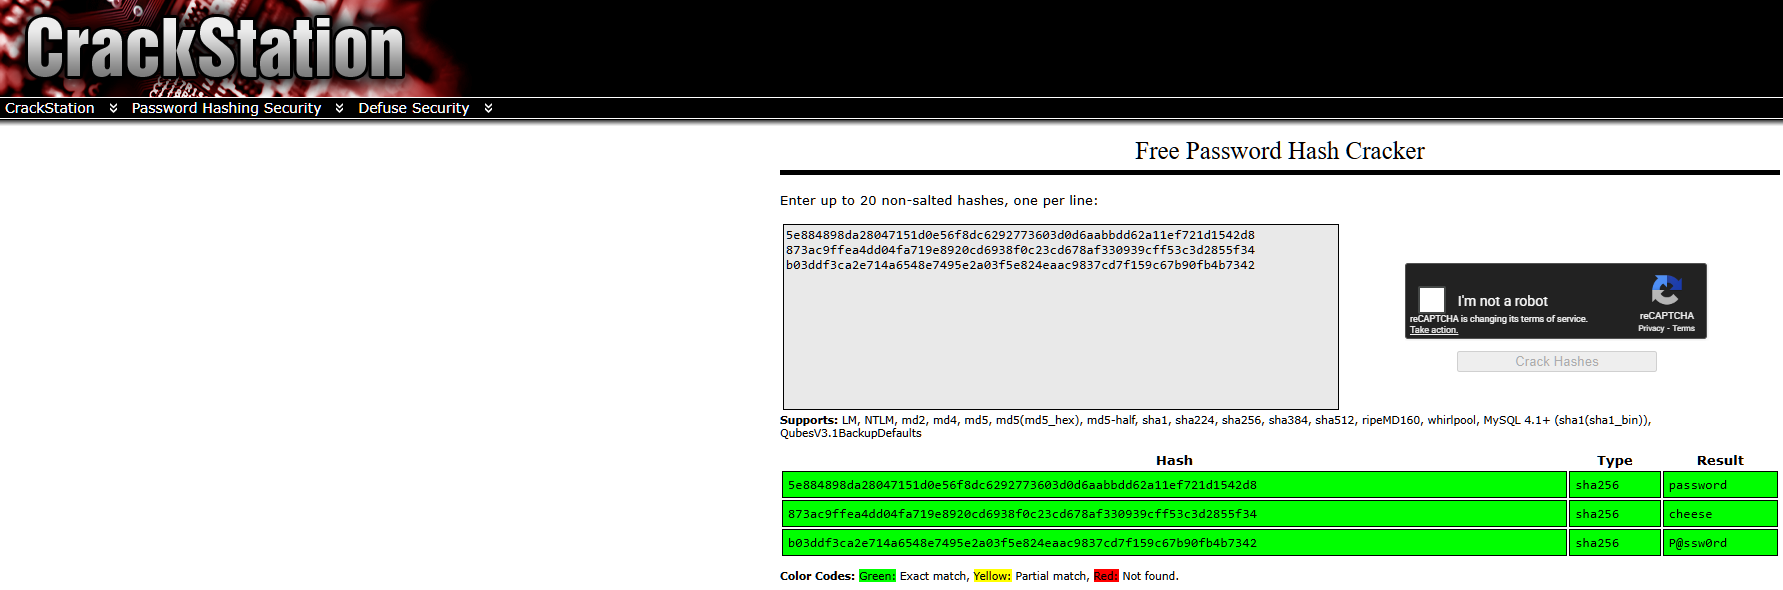
